In [1]:
import pandas as pd
import numpy as np
import re

In [2]:
from sklearn.model_selection import train_test_split
import tensorflow as tf

In [3]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

### Initial Exploration

In [4]:
df_trn = pd.read_csv('SBF_trn.csv')

In [16]:
df_trn.head()

whoTarget  intentYN  sexYN sexReason  offensiveYN annotatorGender  \
0        0.0      0.66    0.0       NaN          1.0           woman   
1        0.0      0.66    0.0       NaN          0.5             man   
2        0.0      0.33    0.0       NaN          0.5             man   
3        1.0      1.00    0.0       NaN          1.0             man   
4        1.0      1.00    0.0       NaN          1.0             man   

  annotatorMinority sexPhrase  speakerMinorityYN             WorkerId  \
0               NaN       NaN                NaN -8935932304856669427   
1               NaN       NaN                NaN  6347880360297734464   
2               NaN       NaN                NaN -7452610791699819066   
3               NaN       NaN                0.0  -500114755446676507   
4               NaN       NaN                0.0  -500114755446676507   

                            HITId annotatorPolitics annotatorRace  \
0  363A7XIFV4G2799C5V96YERJA9AVAM           liberal         white   
1  363A7XIFV4G2799C5V96YERJA9AVAM       mod-liberal         white   
2  363A7XIFV4G2799C5V96YERJA9AVAM           liberal         asian   
3  3JTPR5MTZS6RLS3JBV4IOU0G2X35K5           liberal         white   
4  3JTPR5MTZS6RLS3JBV4IOU0G2X35K5           liberal         white   

   annotatorAge                                               post  \
0          45.0  RT @_LexC__: I'm convinced that some of y'all ...   
1          35.0  RT @_LexC__: I'm convinced that some of y'all ...   
2          23.0  RT @_LexC__: I'm convinced that some of y'all ...   
3          25.0  RT @iBeZo: Stupid fucking nigger LeBron. You f...   
4          25.0  RT @iBeZo: Stupid fucking nigger LeBron. You f...   

  targetMinority targetCategory          targetStereotype  dataSource  
0            NaN            NaN                       NaN  t/davidson  
1            NaN            NaN                       NaN  t/davidson  
2            NaN            NaN                       NaN  t/davidson  
3    black folks           race                all stupid  t/davidson  
4    black folks           race  are not people but apes.  t/davidson

In [5]:
df_simple = df_trn[['post','offensiveYN']].copy()

In [20]:
df_simple.head()

post  offensiveYN
0  RT @_LexC__: I'm convinced that some of y'all ...          1.0
1  RT @_LexC__: I'm convinced that some of y'all ...          0.5
2  RT @_LexC__: I'm convinced that some of y'all ...          0.5
3  RT @iBeZo: Stupid fucking nigger LeBron. You f...          1.0
4  RT @iBeZo: Stupid fucking nigger LeBron. You f...          1.0

In [21]:
df_simple['post'][0]

'RT @_LexC__: I\'m convinced that some of y\'all bitches get pregnant purposely because "birth control &amp; plan b pills" are effective &#128533;&#128056;&#9749;&#65039;'

In [44]:
df_simple['post_split']=[len(x.split(sep)) for x in df_simple['post']]

In [47]:
df_simple[df_simple['post_split']>2].shape

post  offensiveYN  \
118     RT @prettykells: &#8220;@100046729: That's fuc...          1.0   
119     RT @prettykells: &#8220;@100046729: That's fuc...          1.0   
120     RT @prettykells: &#8220;@100046729: That's fuc...          1.0   
121     RT @prettykells: &#8220;@100046729: That's fuc...          1.0   
236     RT @VineForTheByrd: Bae: go text your hoes \nM...          0.0   
...                                                   ...          ...   
111926  Who are your favourite and least favourite inc...          0.0   
112123  I will date ANY femoid: they CANNOT be forever...          1.0   
112124  I will date ANY femoid: they CANNOT be forever...          1.0   
112125  I will date ANY femoid: they CANNOT be forever...          1.0   
112126  I will date ANY femoid: they CANNOT be forever...          1.0   

        post_split  
118              3  
119              3  
120              3  
121              3  
236              4  
...            ...  
111926           3  
112123           6  
112124           6  
112125           6  
112126           6  

[2264 rows x 3 columns]

In [42]:
sep = ': '
stripped = x.split(sep, 1)

#### Text structure observations:
- Observing structure in social media comment reply
- Observing number/character series representing emoji at the end of post

In [38]:
x

'RT @JETzLyfe412: Started off wit nuttin I was hungry, now I got a couple niggas bitches who want me'

In [43]:
stripped

['RT @JETzLyfe412',
 'Started off wit nuttin I was hungry, now I got a couple niggas bitches who want me']

In [6]:
x =df_simple.iloc[118,0]

In [12]:
x

"RT @prettykells: &#8220;@100046729: That's fucked up when a bitch you fw , down talk you.. Then with hoes they claim they don't fw &#128080; funny.&#8221;&#8252;&#65039;&#8252;&#65039;&#8230;"

### Regex Cleaning based on observed pattern

In [16]:
pattern = '^RT.*: '
pattern_2 ='&#[^a-zA-Z]+;$'
re.sub(pattern_2,'',re.sub(pattern,'',x))

"That's fucked up when a bitch you fw , down talk you.. Then with hoes they claim they don't fw &#128080; funny."

In [19]:
df_simple['clean_post']=[re.sub(pattern_2,'',re.sub(pattern,'',x)) for x in df_simple['post']]

In [23]:
df_simple['label']= [x if x!=0.5 else 3 for x in df_simple['offensiveYN']]

In [24]:
df_simple

post  offensiveYN  \
0       RT @_LexC__: I'm convinced that some of y'all ...          1.0   
1       RT @_LexC__: I'm convinced that some of y'all ...          0.5   
2       RT @_LexC__: I'm convinced that some of y'all ...          0.5   
3       RT @iBeZo: Stupid fucking nigger LeBron. You f...          1.0   
4       RT @iBeZo: Stupid fucking nigger LeBron. You f...          1.0   
...                                                   ...          ...   
112895  Thought you fellas might like to explain to so...          1.0   
112896  Thought you fellas might like to explain to so...          0.0   
112897  If female voters were discounted, Labour would...          0.0   
112898  If female voters were discounted, Labour would...          0.0   
112899  If female voters were discounted, Labour would...          0.5   

                                               clean_post  label  
0       I'm convinced that some of y'all bitches get p...    1.0  
1       I'm convinced that some of y'all bitches get p...    3.0  
2       I'm convinced that some of y'all bitches get p...    3.0  
3       Stupid fucking nigger LeBron. You flopping stu...    1.0  
4       Stupid fucking nigger LeBron. You flopping stu...    1.0  
...                                                   ...    ...  
112895  Thought you fellas might like to explain to so...    1.0  
112896  Thought you fellas might like to explain to so...    0.0  
112897  If female voters were discounted, Labour would...    0.0  
112898  If female voters were discounted, Labour would...    0.0  
112899  If female voters were discounted, Labour would...    3.0  

[112900 rows x 4 columns]

In [25]:
#df_simple.to_csv('trn_cleaned.csv')

In [4]:
df_simple = pd.read_csv('trn_cleaned.csv')

In [5]:
df_simple.head()

Unnamed: 0                                               post  offensiveYN  \
0           0  RT @_LexC__: I'm convinced that some of y'all ...          1.0   
1           1  RT @_LexC__: I'm convinced that some of y'all ...          0.5   
2           2  RT @_LexC__: I'm convinced that some of y'all ...          0.5   
3           3  RT @iBeZo: Stupid fucking nigger LeBron. You f...          1.0   
4           4  RT @iBeZo: Stupid fucking nigger LeBron. You f...          1.0   

                                          clean_post  label  
0  I'm convinced that some of y'all bitches get p...    1.0  
1  I'm convinced that some of y'all bitches get p...    3.0  
2  I'm convinced that some of y'all bitches get p...    3.0  
3  Stupid fucking nigger LeBron. You flopping stu...    1.0  
4  Stupid fucking nigger LeBron. You flopping stu...    1.0

In [6]:
sentences = df_simple['clean_post'].values
y = df_simple['label'].values

In [7]:
sentences_train,sentences_test,y_train,y_test = train_test_split(
                                                sentences, y,  
                                                test_size=0.20,  
                                                random_state=7)

In [8]:
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(sentences_train)

In [9]:
X_train = tokenizer.texts_to_sequences(sentences_train)
X_test = tokenizer.texts_to_sequences(sentences_test)

In [10]:
vocab_size = len(tokenizer.word_index) + 1
maxlen = 100

In [11]:
X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

In [12]:
def create_embedding_matrix(filepath, word_index, embedding_dim):
    vocab_size = len(word_index) + 1  
    # Adding again 1 because of reserved 0 index
    embedding_matrix = np.zeros((vocab_size, embedding_dim))

    with open(filepath) as f:
        for line in f:
            word, *vector = line.split()
            if word in word_index:
                idx = word_index[word] 
                embedding_matrix[idx] = np.array(
                                        vector, dtype=np.float32)[:embedding_dim]

    return embedding_matrix

In [34]:
embedding_dim = 50
embedding_matrix = create_embedding_matrix('glove.6B.50d.txt' ,
                                            tokenizer.word_index,  
                                            embedding_dim)

### Initial training tryout
- Without label voting scheme, the model fail to converge because the "ground truth" is "too noisy"
- the detailed reason being that each post is labled by multiple people with different background, and their labeling may contradict
- stopped the training prematurely based on the above observation

In [37]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
embedding_dim = 100

model = Sequential()
model.add(layers.Embedding(vocab_size, embedding_dim, input_length=maxlen))
model.add(layers.Conv1D(128, 5, activation='relu'))
model.add(layers.Conv1D(128, 5, activation='relu'))
model.add(layers.GlobalMaxPooling1D())
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(3, activation='sigmoid'))
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(X_train, y_train,
                    epochs=5,
                    validation_data=(X_test, y_test),
                    batch_size=100)

Epoch 1/5
904/904 [==============================] - 309s 342ms/step - loss: nan - accuracy: 0.4135 - val_loss: nan - val_accuracy: 0.4141
Epoch 2/5
904/904 [==============================] - 303s 335ms/step - loss: nan - accuracy: 0.4132 - val_loss: nan - val_accuracy: 0.4141
Epoch 3/5
904/904 [==============================] - 298s 330ms/step - loss: nan - accuracy: 0.4132 - val_loss: nan - val_accuracy: 0.4141
Epoch 4/5
127/904 [===>..........................] - ETA: 4:06 - loss: nan - accuracy: 0.4139

KeyboardInterrupt: 

# Start of exploring voting scheme and retrain

In [ ]:
df_simple = pd.read_csv('trn_cleaned.csv')

In [13]:
df_simple

Unnamed: 0                                               post  \
0                0  RT @_LexC__: I'm convinced that some of y'all ...   
1                1  RT @_LexC__: I'm convinced that some of y'all ...   
2                2  RT @_LexC__: I'm convinced that some of y'all ...   
3                3  RT @iBeZo: Stupid fucking nigger LeBron. You f...   
4                4  RT @iBeZo: Stupid fucking nigger LeBron. You f...   
...            ...                                                ...   
112895      112895  Thought you fellas might like to explain to so...   
112896      112896  Thought you fellas might like to explain to so...   
112897      112897  If female voters were discounted, Labour would...   
112898      112898  If female voters were discounted, Labour would...   
112899      112899  If female voters were discounted, Labour would...   

        offensiveYN                                         clean_post  label  
0               1.0  I'm convinced that some of y'all bitches get p...    1.0  
1               0.5  I'm convinced that some of y'all bitches get p...    3.0  
2               0.5  I'm convinced that some of y'all bitches get p...    3.0  
3               1.0  Stupid fucking nigger LeBron. You flopping stu...    1.0  
4               1.0  Stupid fucking nigger LeBron. You flopping stu...    1.0  
...             ...                                                ...    ...  
112895          1.0  Thought you fellas might like to explain to so...    1.0  
112896          0.0  Thought you fellas might like to explain to so...    0.0  
112897          0.0  If female voters were discounted, Labour would...    0.0  
112898          0.0  If female voters were discounted, Labour would...    0.0  
112899          0.5  If female voters were discounted, Labour would...    3.0  

[112900 rows x 5 columns]

In [14]:
df_agg = df_simple.groupby(by=["clean_post"]).count().reset_index()

In [15]:
df_agg[df_agg['post']>3]

clean_post  Unnamed: 0  post  \
8      \nJust watched facial recognition technology f...           7     7   
20      I propose a new law \n\n Any congressman or w...           6     6   
23      Just a partial list of the Dem playbook\n\nfo...           5     5   
26      all the liberals who are saying to get rid of...           4     4   
29     !!! RT @mayasolovely: As a woman you shouldn't...           4     4   
...                                                  ...         ...   ...   
35458  “You can drink an ugly woman pretty, faster th...           6     6   
35459  “You da bomb!” “No, you da bomb!” In America –...           6     6   
35469  ‼️PRANK ALERT ‼️ THIS WEEKS #DolanTwinsNewVide...           6     6   
35470  ⁠Why do wh*te people like to play hockey?  It’...           4     4   
35481  ⚽️ POLL: After an eventful day in the #Champio...           6     6   

       offensiveYN  label  
8                7      7  
20               6      6  
23               5      5  
26               4      4  
29               4      4  
...            ...    ...  
35458            6      6  
35459            6      6  
35469            6      6  
35470            4      4  
35481            6      6  

[6320 rows x 5 columns]

<AxesSubplot:>

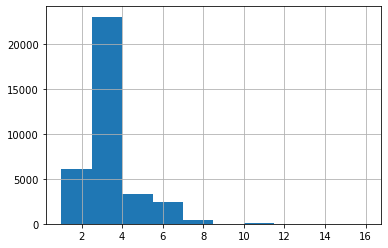

In [16]:
df_agg['post'].hist()

In [ ]:
#2017 na value for offensiveYN

In [17]:
df_simple = df_simple[df_simple['offensiveYN'].notna()]

In [18]:
df_agg = df_simple.groupby(by=["clean_post"])['offensiveYN'].agg(lambda x:pd.Series.mode(x)[0]).reset_index()

In [19]:
df_agg

clean_post  offensiveYN
0      \n\nBill Kristol and Ben Shaprio, two turds in...          1.0
1      \n\nRose\n🌹Taylor‏ @RealRoseTaylor 6h6 hours a...          0.0
2      \nCharlie Kirk‏\n\nJohnny Depp calls for death...          1.0
3      \nDavid Knight‏ \n\nNotice how quickly things ...          0.0
4      \nFinland fireball: Time-lapse video shows nig...          0.0
...                                                  ...          ...
35414  👉 Illegally in the country after 5 deportation...          0.0
35415  💥Breaking💥\nJulian Assange is the gate keeper ...          0.0
35416  📖 2Kings 22:19  because your heart was peniten...          0.0
35417  🚨#FAKENEWSAWARDS🚨\n\n🚨 who is #1 fake news ?🚨\...          0.0
35418  🚨BREAKING: illegal alien 5x deported on 7 felo...          1.0

[35419 rows x 2 columns]

In [62]:
df_agg['clean_post']

array(['\n\nBill Kristol and Ben Shaprio, two turds in the same toilet bowl.\n\n',
       "\n\nRose\n🌹Taylor\u200f @RealRoseTaylor 6h6 hours ago\n\nNewt nails it 🎯\n\n🇺🇸Say what you will about @POTUS style, you can't deny how effective he is 💪🏻\n\n#SundayMorning #MAGA\npic.twitter.com/s6o89Yg9PT\n",
       '\nCharlie Kirk\u200f\n\nJohnny Depp calls for death of Trump -- left says it\'s "free speech"\n\nConservatives come to campus to speak -- left calls it "hate speech"\n',
       ...,
       '📖 2Kings 22:19  because your heart was penitent, and you humbled yourself before the LORD, ... and you have torn your clothes and wept before me, I also have heard you, declares the LORD.',
       '🚨#FAKENEWSAWARDS🚨\n\n🚨 who is\xa0#1\xa0fake news ?🚨\n\n🚨which 1 of these?⬇⬇🚨',
       '🚨BREAKING: illegal alien 5x deported on 7 felonies found not guilty in the murder of Kate Steinle who he shot with a gun\n\nJury full of communists just allowed a foreigner to execute an American citizen without repe

In [44]:
df_agg['label']= [x if x!=0.5 else 3 for x in df_agg['offensiveYN']]

In [45]:
sentences = df_agg['clean_post'].values
#y = df_agg['label'].values

In [46]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(df_agg['label'].values)
#test_y = le.transform(test_y.values)

In [69]:
from tensorflow.keras.utils import to_categorical

In [47]:
sentences_train,sentences_test,y_train,y_test = train_test_split(
                                                sentences, y,  
                                                test_size=0.20,  
                                                random_state=7)

In [70]:
y_train = to_categorical(y_train, 3)
y_test = to_categorical(y_test, 3)

numpy.int64

In [48]:
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(sentences_train)

In [49]:
X_train = tokenizer.texts_to_sequences(sentences_train)
X_test = tokenizer.texts_to_sequences(sentences_test)

In [50]:
vocab_size = len(tokenizer.word_index) + 1
maxlen = 100

In [51]:
X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

In [52]:
def create_embedding_matrix(filepath, word_index, embedding_dim):
    vocab_size = len(word_index) + 1  
    # Adding again 1 because of reserved 0 index
    embedding_matrix = np.zeros((vocab_size, embedding_dim))

    with open(filepath) as f:
        for line in f:
            word, *vector = line.split()
            if word in word_index:
                idx = word_index[word] 
                embedding_matrix[idx] = np.array(
                                        vector, dtype=np.float32)[:embedding_dim]

    return embedding_matrix

In [53]:
embedding_dim = 50
embedding_matrix = create_embedding_matrix('glove.6B.50d.txt' ,
                                            tokenizer.word_index,  
                                            embedding_dim)

In [ ]:
 = Conv1D(128, 3, activation='relu')(x)
x = MaxPooling1D(3)(x)
x = Conv1D(128, 3, activation='relu')(x)
x = MaxPooling1D(3)(x)
x = Conv1D(128, 3, activation='relu')(x)
x = GlobalMaxPooling1D()(x)
x = Dense(128, activation='relu')(x)
output = Dense(len(possible_labels), activation='sigmoid')(x

### Recording below as baseline performance

In [71]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
embedding_dim = 100

model = Sequential()
model.add(layers.Embedding(vocab_size, embedding_dim, input_length=maxlen))
model.add(layers.Conv1D(128, 5, activation='relu'))
model.add(layers.Conv1D(128, 5, activation='relu'))
model.add(layers.GlobalMaxPooling1D())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(3, activation='sigmoid'))
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(X_train, y_train,
                    epochs=5,
                    validation_data=(X_test, y_test),
                    batch_size=5)

Epoch 1/5
5667/5667 [==============================] - 323s 57ms/step - loss: 0.7222 - accuracy: 0.7010 - val_loss: 0.6723 - val_accuracy: 0.7326
Epoch 2/5
5667/5667 [==============================] - 323s 57ms/step - loss: 0.6067 - accuracy: 0.7659 - val_loss: 0.6923 - val_accuracy: 0.7349
Epoch 3/5
5667/5667 [==============================] - 324s 57ms/step - loss: 0.5166 - accuracy: 0.8050 - val_loss: 0.7212 - val_accuracy: 0.7276
Epoch 4/5
5667/5667 [==============================] - 323s 57ms/step - loss: 0.4177 - accuracy: 0.8451 - val_loss: 0.8624 - val_accuracy: 0.7158
Epoch 5/5
5667/5667 [==============================] - 319s 56ms/step - loss: 0.3264 - accuracy: 0.8753 - val_loss: 0.9675 - val_accuracy: 0.7023


In [ ]:
### incorporate numeric features/ categorical features

